# Assignment 1
Note: All the guidance is for matlab.

## Questions
1. The image, stored in the file car_dis.png, is distorted. The objective is to apply a filter that removes the distortion without affecting the original image.

  Write and execute an m-file that:
    * clears the workspace and closes all possible figure windows (use clear variables and closeall, respectively)
    * reads the image from file (imread), converts it to an intensity image of type double (im2double), and displays the image in a figure window on the screen (imshow).
    * calculates the Fourier transform and shows the log-amplitude spectrum as an image on the screen. Besure to do so in a controlled manner:
      1. The origin should be in the centre;
      2. The logarithmic scalemaps the magnitudes to intensities such that the interesting part of the range of magnitudes is displayed well. Include a title, and the correct x- and y labels to the axes. Write the resulting figure window as a png image to file (use: print –r150 –dpng Imlogmag.png). Do not use the copy-and-paste option, nor the ‘save as’ of the figure window as the result is not reproducible (it will depend too much on your screen resolution).

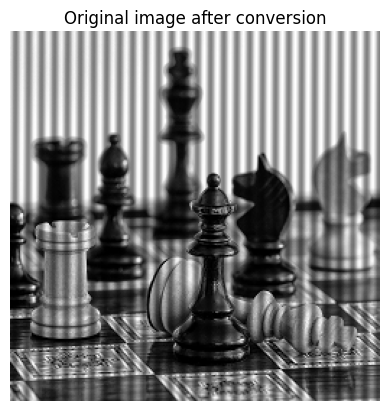

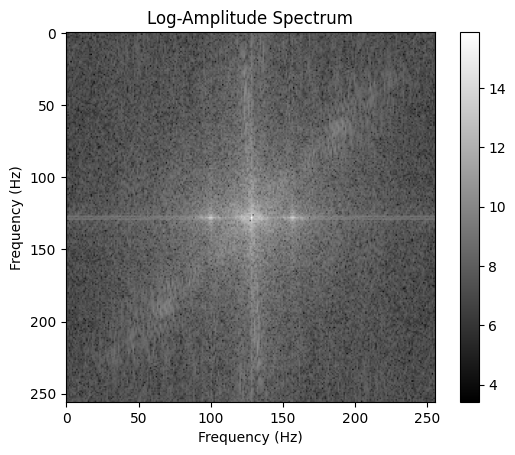

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Clear workspace
plt.close('all')

# Read the image
image = cv2.imread('car_dis.png', cv2.IMREAD_GRAYSCALE)

# Convert the image to type double
image_double = image.astype(np.float64)

# Display the original image
plt.figure()
plt.imshow(image_double, cmap='gray')
plt.title('Original image after conversion')
plt.axis('off')  # Turn off axis labels and ticks

plt.savefig('car_dis_conv.png', dpi=150)

# Calculate the Fourier transform
f_transform = np.fft.fft2(image_double)

# Shift the zero frequency components to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Calculate the log-amplitude spectrum
log_amplitude = np.log(np.abs(f_transform_shifted) + 1)  # Adding 1 to avoid log(0)

# Display the log-amplitude spectrum
plt.figure()
plt.imshow(log_amplitude, cmap='gray')

# Set the origin to the center
plt.colorbar()
plt.title('Log-Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')

# Save the figure as a PNG image
plt.savefig('Imlogmag.png', dpi=150)

# Show the plot
plt.show()


## Question 2
Suppose that the pixel size of the image im is Delta x Delta. The distortion in the image looks like a harmonic function.
By using the cursor of the figure window, created in question 1a, determine, i.e. measure, the wavelength of
this harmonic function (expressed in pixel size Delta ; that is the result could be, for instance, 4*Delta). Give
the frequency Rho of this harmonic, also expressed2 in pixel size delta :

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('car_dis.png', cv2.IMREAD_GRAYSCALE)

# Convert the image to type double
image_double = image.astype(np.float64)

# Calculate the Fourier transform
f_transform = np.fft.fft2(image_double)

# Shift the zero frequency components to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Calculate the log-amplitude spectrum
log_amplitude = np.log(np.abs(f_transform_shifted) + 1)  # Adding 1 to avoid log(0)

# Calculate the 2D DFT of the log-amplitude spectrum
dft_log_amplitude = np.fft.fft2(log_amplitude)

# Calculate the magnitude spectrum of the DFT
magnitude_spectrum = np.abs(dft_log_amplitude)

# Find the location of the peak (excluding the DC component)
peak_location = np.unravel_index(np.argmax(magnitude_spectrum[1:, 1:]), magnitude_spectrum.shape)

# Calculate the wavelength and frequency of the harmonic
N, M = log_amplitude.shape
Delta_x = 1  # Assuming pixel size Delta
wavelength = 2 * N / (peak_location[0] + 1) * Delta_x  # Correct for excluding DC component
frequency_rho = 1 / wavelength

# Print the results
print(f'Wavelength of the harmonic: {wavelength} pixels (Delta)')
print(f'Frequency of the harmonic (Rho): {frequency_rho} pixels per Delta')


Wavelength of the harmonic: 512.0 pixels (Delta)
Frequency of the harmonic (Rho): 0.001953125 pixels per Delta


## Question 3


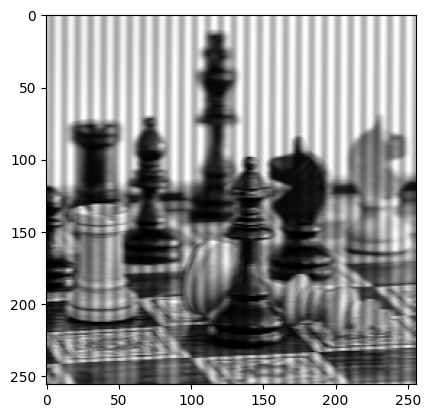

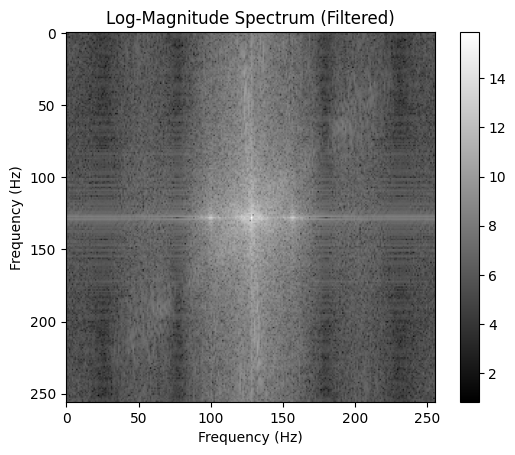

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('car_dis.png', cv2.IMREAD_GRAYSCALE)

# Create a rectangular PSF
psf_size_horizontal = 5  # Adjust as needed
psf_size_vertical = 1    # Adjust as needed
psf = np.ones((psf_size_vertical, psf_size_horizontal), dtype=np.float32) / (psf_size_horizontal * psf_size_vertical)

# Gaussian PSF
# Define the size of the PSF kernel
kernel_size = 15  # Adjust the size as needed

# Create a grid of coordinates (assumes a square kernel)
x = np.arange(-kernel_size // 2, kernel_size // 2 + 1)
y = np.arange(-kernel_size // 2, kernel_size // 2 + 1)

# Create a 2D grid of coordinates
X, Y = np.meshgrid(x, y)

# Define the standard deviation (sigma) for the Gaussian
sigma = 2.0  # Adjust the value as needed

# Calculate the Gaussian PSF
psf_gaussian = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
#print(psf_gaussian)

# Normalize the PSF to ensure its values sum to 1
psf_gaussian /= np.sum(psf_gaussian)

# Apply the filter using cv2.filter2D
filtered_image = cv2.filter2D(image, -1, psf)

# Save the filtered image as JPEG
cv2.imwrite('IMfil.jpg', filtered_image)
plt.figure()
plt.imshow(filtered_image, cmap='gray')

# Calculate the Fourier transform of the filtered image
filtered_transform = np.fft.fft2(filtered_image)

# Shift the zero frequency components to the center
filtered_transform_shifted = np.fft.fftshift(filtered_transform)

# Calculate the log-magnitude spectrum
log_amplitude_filtered = np.log(np.abs(filtered_transform_shifted) + 1)  # Adding 1 to avoid log(0)

# Display the log-magnitude spectrum
plt.figure()
plt.imshow(log_amplitude_filtered, cmap='gray')

# Set the origin to the center
plt.colorbar()
plt.title('Log-Magnitude Spectrum (Filtered)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')

# Save the log-amplitude spectrum as an image (PNG format)
plt.savefig('LogAmplitudeSpectrumFiltered.png', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()


## Question 3c

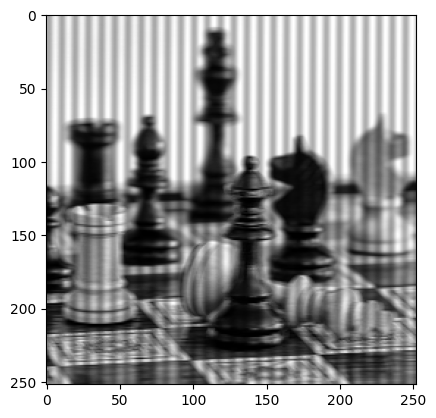

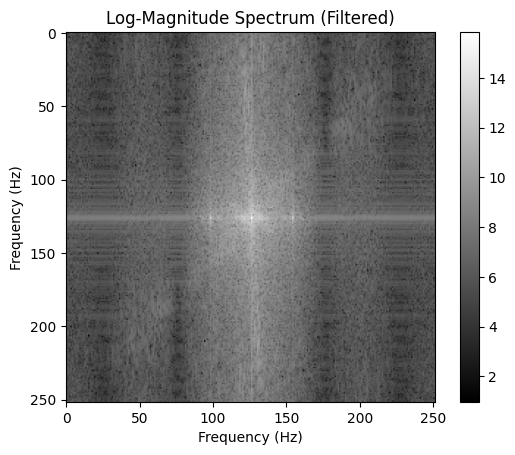

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('car_dis.png', cv2.IMREAD_GRAYSCALE)

# Create a rectangular PSF
psf_size_horizontal = 5  # Adjust as needed
psf_size_vertical = 1    # Adjust as needed
psf = np.ones((psf_size_vertical, psf_size_horizontal), dtype=np.float32) / (psf_size_horizontal * psf_size_vertical)

# Pad the image using replicate border mode
border_size = max(psf_size_horizontal // 2, psf_size_vertical // 2)  # Choose the maximum padding size
filtered_image_padded = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_REPLICATE)


# ================ Gaussian PSF =================
# Define the size of the PSF kernel
kernel_size = 15  # Adjust the size as needed

# Create a grid of coordinates (assumes a square kernel)
x = np.arange(-kernel_size // 2, kernel_size // 2 + 1)
y = np.arange(-kernel_size // 2, kernel_size // 2 + 1)

# Create a 2D grid of coordinates
X, Y = np.meshgrid(x, y)

# Define the standard deviation (sigma) for the Gaussian
sigma = 2.0  # Adjust the value as needed

# Calculate the Gaussian PSF
psf_gaussian = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
#print(psf_gaussian)

# Normalize the PSF to ensure its values sum to 1
psf_gaussian /= np.sum(psf_gaussian)
# ======= End of Gaussian PSF Implementation =====


# Apply the filter using cv2.filter2D
filtered_image = cv2.filter2D(image, -1, psf)

# Remove the added border to get the result with the same size as the input image
filtered_image = filtered_image[border_size:-border_size, border_size:-border_size]

# Save the filtered image as JPEG
cv2.imwrite('IMfil.jpg', filtered_image)
plt.figure()
plt.imshow(filtered_image, cmap='gray')

# Calculate the Fourier transform of the filtered image
filtered_transform = np.fft.fft2(filtered_image)

# Shift the zero frequency components to the center
filtered_transform_shifted = np.fft.fftshift(filtered_transform)

# Calculate the log-magnitude spectrum
log_amplitude_filtered = np.log(np.abs(filtered_transform_shifted) + 1)  # Adding 1 to avoid log(0)

# Display the log-magnitude spectrum
plt.figure()
plt.imshow(log_amplitude_filtered, cmap='gray')

# Set the origin to the center
plt.colorbar()
plt.title('Log-Magnitude Spectrum (Filtered)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')


# Save the log-amplitude spectrum as an image (PNG format)
plt.savefig('LogAmplitudeSpectrumFiltered.png', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()

## Question 4

Attenuation factor at frequency (129, 157): 0.19963865797843514
Determined Filter Type: Complex/Custom Filter


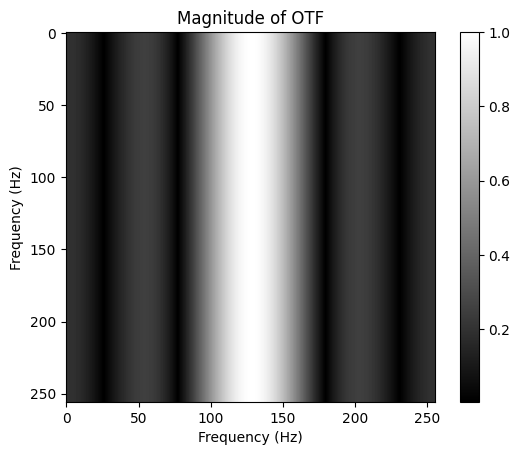

Maximum absolute value of imaginary part of OTF: 0.6464493866877694


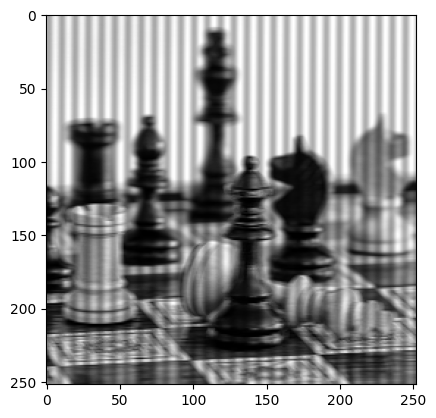

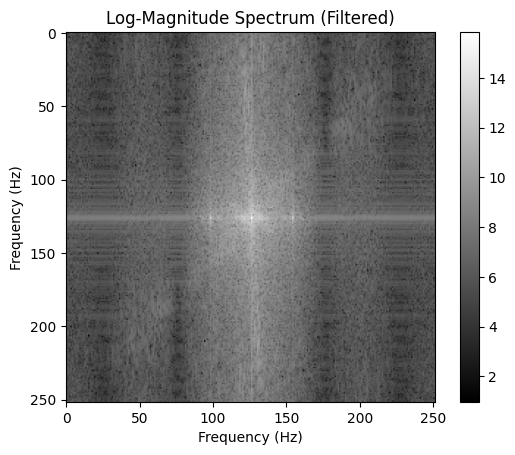

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the image
image = cv2.imread('car_dis.png', cv2.IMREAD_GRAYSCALE)

# Create a rectangular PSF
psf_size_horizontal = 5  # Adjust as needed
psf_size_vertical = 1    # Adjust as needed
psf = np.ones((psf_size_vertical, psf_size_horizontal), dtype=np.float32) / (psf_size_horizontal * psf_size_vertical)

# Pad the PSF to the same size as the image
psf_padded = np.zeros_like(image, dtype=np.float32)
psf_padded[:psf_size_vertical, :psf_size_horizontal] = psf

# Pad the image using replicate border mode
border_size = max(psf_size_horizontal // 2, psf_size_vertical // 2)  # Choose the maximum padding size
filtered_image_padded = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_REPLICATE)

# Calculate the Optical Transfer Function (OTF)
OTF = np.fft.fft2(psf_padded)

# Define the frequency (u, v) at which to extract the attenuation factor
desired_frequency = (129, 157)  # Adjust to specific frequency of interest

# Extract the attenuation factor at the desired frequency
attenuation_factor = np.abs(OTF[desired_frequency[1], desired_frequency[0]])

print(f'Attenuation factor at frequency {desired_frequency}: {attenuation_factor}')

# Shift the zero frequency components to the center
OTF_shifted = np.fft.fftshift(OTF)

# Calculate the magnitude and imaginary part of the OTF
magnitude_OTF = np.abs(OTF_shifted)
imaginary_OTF = np.imag(OTF_shifted)

# Determine the type of filter based on OTF characteristics

# Find peaks in the magnitude response
peaks, _ = find_peaks(magnitude_OTF.flatten(), height=0.1)  # Adjust the height threshold as needed

# Define a function to classify the filter type based on peak locations
def classify_filter_type(peaks, image_shape):
    center_frequency = (image_shape[1] // 2, image_shape[0] // 2)
    if len(peaks) == 1:
        if peaks[0] == center_frequency:
            return "Low-Pass Filter"
        else:
            return "High-Pass Filter"
    elif len(peaks) == 2:
        return "Band-Pass Filter"
    else:
        return "Complex/Custom Filter"

# Get the image shape to determine center frequency
image_shape = image.shape

# Classify the filter type
filter_type = classify_filter_type(peaks, image_shape)

# Print the determined filter type
print(f'Determined Filter Type: {filter_type}')

# Display the magnitude of the OTF as an intensity image
plt.figure()
plt.imshow(magnitude_OTF, cmap='gray')
plt.colorbar()
plt.title('Magnitude of OTF')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')

# Save and Display the Magnitude OTF
plt.savefig('MagnitudeOTF.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate and print the maximum absolute value of the imaginary part of OTF
max_abs_imag_OTF = np.max(np.abs(imaginary_OTF))
print(f'Maximum absolute value of imaginary part of OTF: {max_abs_imag_OTF}')

# ================ Gaussian PSF =================
# Define the size of the PSF kernel
kernel_size = 15  # Adjust the size as needed

# Create a grid of coordinates (assumes a square kernel)
x = np.arange(-kernel_size // 2, kernel_size // 2 + 1)
y = np.arange(-kernel_size // 2, kernel_size // 2 + 1)

# Create a 2D grid of coordinates
X, Y = np.meshgrid(x, y)

# Define the standard deviation (sigma) for the Gaussian
sigma = 2.0  # Adjust the value as needed

# Calculate the Gaussian PSF
psf_gaussian = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
#print(psf_gaussian)

# Normalize the PSF to ensure its values sum to 1
psf_gaussian /= np.sum(psf_gaussian)
# ======= End of Gaussian PSF Implementation =====


# Apply the filter using cv2.filter2D
filtered_image = cv2.filter2D(image, -1, psf)

# Remove the added border to get the result with the same size as the input image
filtered_image = filtered_image[border_size:-border_size, border_size:-border_size]

# Save the filtered image as JPEG
cv2.imwrite('IMfil.jpg', filtered_image)
plt.figure()
plt.imshow(filtered_image, cmap='gray')

# Calculate the Fourier transform of the filtered image
filtered_transform = np.fft.fft2(filtered_image)

# Shift the zero frequency components to the center
filtered_transform_shifted = np.fft.fftshift(filtered_transform)

# Calculate the log-magnitude spectrum
log_amplitude_filtered = np.log(np.abs(filtered_transform_shifted) + 1)  # Adding 1 to avoid log(0)

# Display the log-magnitude spectrum
plt.figure()
plt.imshow(log_amplitude_filtered, cmap='gray')

# Set the origin to the center
plt.colorbar()
plt.title('Log-Magnitude Spectrum (Filtered)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')


# Save the log-amplitude spectrum as an image (PNG format)
plt.savefig('LogAmplitudeSpectrumFiltered.png', dpi=150, bbox_inches='tight')

# Show the plot
plt.show()

## Question 5

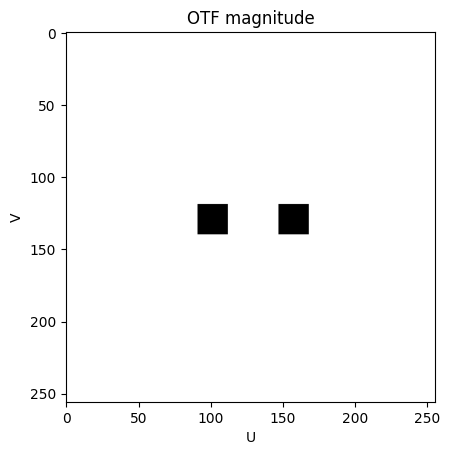

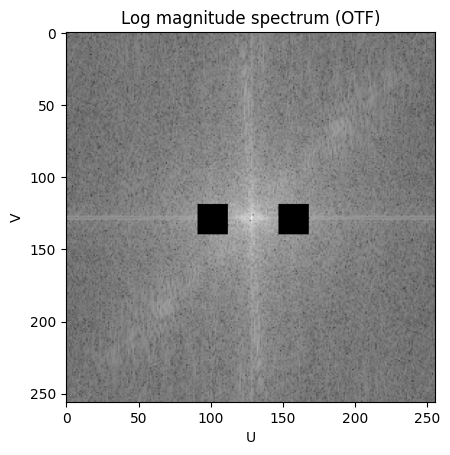

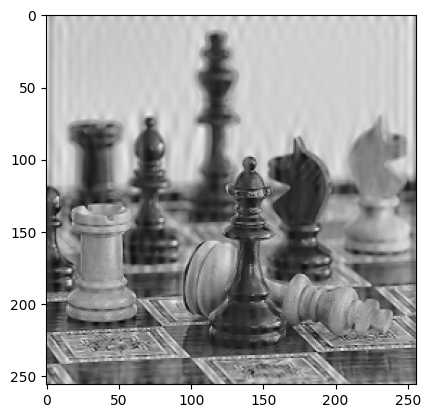

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the image
image = cv2.imread('car_dis.png', cv2.IMREAD_GRAYSCALE)

# Define the size of the rectangular area (s is an odd integer)
s = 21

# Create an OTF matrix with ones
H = np.ones_like(image, dtype=np.float32)

# Define row, col, rstart, rend, cstart, cend for the first dominant frequency
row = 129
col = 157
rstart = math.ceil(row - s/2)
rend = math.floor(row + s/2)
cstart = math.ceil(col - s/2)
cend = math.floor(col + s/2)
H[rstart:rend+1, cstart:cend+1] = 0

# Define row, col, rstart, rend, cstart, cend for the second dominant frequency
row = 129
col = 101
rstart = math.ceil(row - s/2)
rend = math.floor(row + s/2)
cstart = math.ceil(col - s/2)
cend = math.floor(col + s/2)
H[rstart:rend+1, cstart:cend+1] = 0

# Display the magnitude of OTF
plt.figure()
plt.imshow(np.abs(H), cmap='gray')
plt.title('OTF magnitude')
plt.xlabel('U')
plt.ylabel('V')

# Save the OTF magnitude as an image (PNG format)
plt.savefig('IMotfmagnitude.png', dpi=150, bbox_inches='tight')

# Calculate the filtered image
H_fftshift = np.fft.fftshift(np.abs(H))
h_filter = H_fftshift * np.fft.fft2(image)
apply_filter = np.fft.ifft2(h_filter).real

# Compute the maximum absolute value of the imaginary part
max_imaginary_part = np.max(np.abs(np.imag(apply_filter.ravel())))

# Display the log-magnitude spectrum of the filtered image
plt.figure()
plt.imshow(np.log(np.fft.fftshift(np.abs(h_filter)) + 1), cmap='gray')
plt.title('Log magnitude spectrum (OTF)')
plt.xlabel('U')
plt.ylabel('V')

# Save the log-magnitude spectrum as an image (PNG format)
plt.savefig('IMlogfilteredorfmagnitude.png', dpi=150, bbox_inches='tight')

# Display the filtered image
plt.figure()
plt.imshow(apply_filter, cmap='gray')

# Save the filtered image as an image (PNG format)
cv2.imwrite('final.png', apply_filter)

plt.show()


## Final Version
All the code is stuck together

Wavelength of the harmonic: 512.0 pixels (Delta)
Frequency of the harmonic (Rho): 0.001953125 pixels per Delta
Attenuation factor at frequency (129, 157): 0.19963865797843514
Determined Filter Type: Complex/Custom Filter


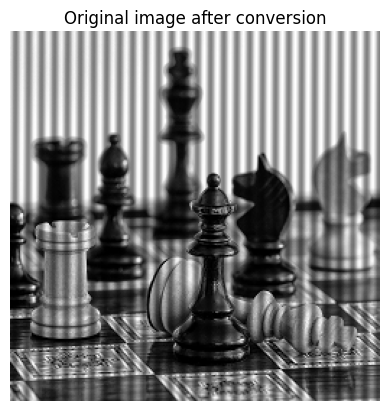

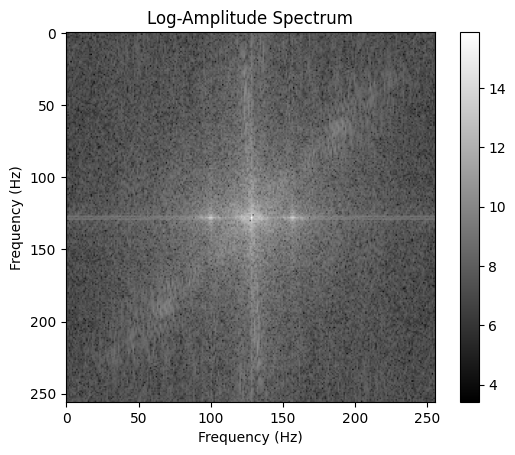

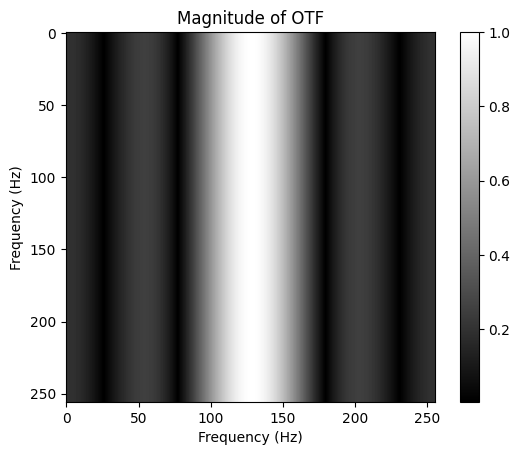

Maximum absolute value of imaginary part of OTF: 0.6464493866877694


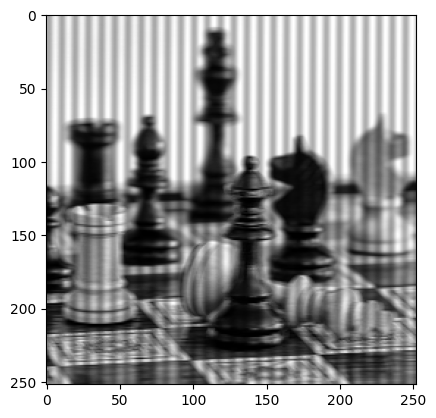

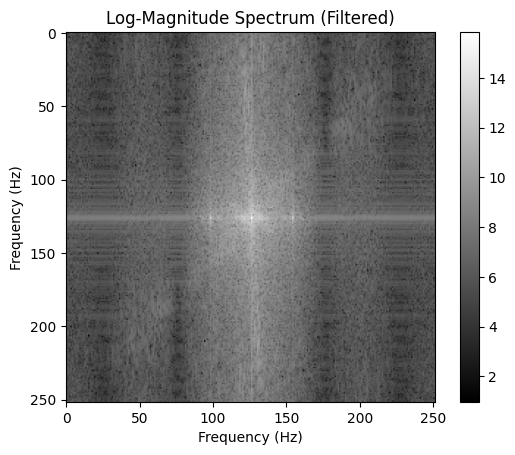

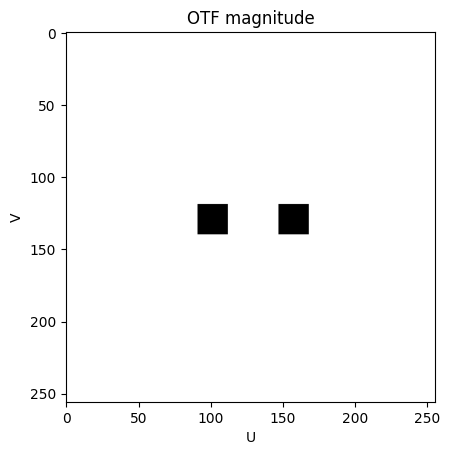

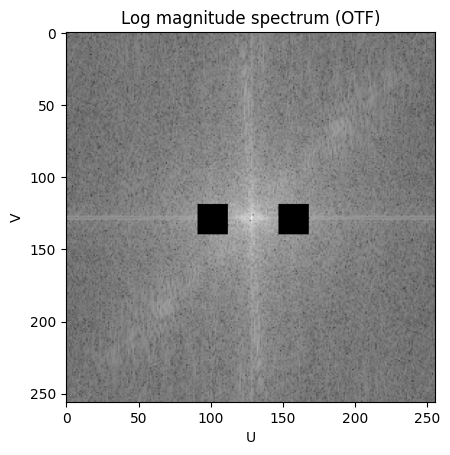

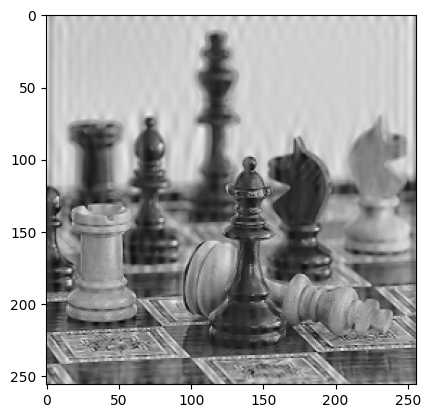

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Clear workspace
plt.close('all')

# Read the image
image = cv2.imread('car_dis.png', cv2.IMREAD_GRAYSCALE)

# Question 1
# Convert the image to type double
image_double = image.astype(np.float64)

# Display the original image
plt.figure()
plt.imshow(image_double, cmap='gray')
plt.title('Original image after conversion')
plt.axis('off')  # Turn off axis labels and ticks

plt.savefig('car_dis_conv.png', dpi=150)

# Calculate the Fourier transform
f_transform = np.fft.fft2(image_double)

# Shift the zero frequency components to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Calculate the log-amplitude spectrum
log_amplitude = np.log(np.abs(f_transform_shifted) + 1)  # Adding 1 to avoid log(0)

# Display the log-amplitude spectrum
plt.figure()
plt.imshow(log_amplitude, cmap='gray')

# Set the origin to the center
plt.colorbar()
plt.title('Log-Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')

# Save the figure as a PNG image
plt.savefig('Imlogmag.png', dpi=150)

# Question 2
# Calculate the 2D DFT of the log-amplitude spectrum
dft_log_amplitude = np.fft.fft2(log_amplitude)

# Calculate the magnitude spectrum of the DFT
magnitude_spectrum = np.abs(dft_log_amplitude)

# Find the location of the peak (excluding the DC component)
peak_location = np.unravel_index(np.argmax(magnitude_spectrum[1:, 1:]), magnitude_spectrum.shape)

# Calculate the wavelength and frequency of the harmonic
N, M = log_amplitude.shape
Delta_x = 1  # Assuming pixel size Delta
wavelength = 2 * N / (peak_location[0] + 1) * Delta_x  # Correct for excluding DC component
frequency_rho = 1 / wavelength

# Print the results
print(f'Wavelength of the harmonic: {wavelength} pixels (Delta)')
print(f'Frequency of the harmonic (Rho): {frequency_rho} pixels per Delta')

# Create a rectangular PSF
psf_size_horizontal = 5  # Adjust as needed
psf_size_vertical = 1    # Adjust as needed
psf = np.ones((psf_size_vertical, psf_size_horizontal), dtype=np.float32) / (psf_size_horizontal * psf_size_vertical)

# Pad the PSF to the same size as the image
psf_padded = np.zeros_like(image, dtype=np.float32)
psf_padded[:psf_size_vertical, :psf_size_horizontal] = psf

# Pad the image using replicate border mode
border_size = max(psf_size_horizontal // 2, psf_size_vertical // 2)  # Choose the maximum padding size
filtered_image_padded = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_REPLICATE)

# Calculate the Optical Transfer Function (OTF)
OTF = np.fft.fft2(psf_padded)

# Define the frequency (u, v) at which to extract the attenuation factor
desired_frequency = (129, 157)  # Adjust to specific frequency of interest

# Extract the attenuation factor at the desired frequency
attenuation_factor = np.abs(OTF[desired_frequency[1], desired_frequency[0]])

print(f'Attenuation factor at frequency {desired_frequency}: {attenuation_factor}')

# Shift the zero frequency components to the center
OTF_shifted = np.fft.fftshift(OTF)

# Calculate the magnitude and imaginary part of the OTF
magnitude_OTF = np.abs(OTF_shifted)
imaginary_OTF = np.imag(OTF_shifted)

# Determine the type of filter based on OTF characteristics

# Find peaks in the magnitude response
peaks, _ = find_peaks(magnitude_OTF.flatten(), height=0.1)  # Adjust the height threshold as needed

# Define a function to classify the filter type based on peak locations
def classify_filter_type(peaks, image_shape):
    center_frequency = (image_shape[1] // 2, image_shape[0] // 2)
    if len(peaks) == 1:
        if peaks[0] == center_frequency:
            return "Low-Pass Filter"
        else:
            return "High-Pass Filter"
    elif len(peaks) == 2:
        return "Band-Pass Filter"
    else:
        return "Complex/Custom Filter"

# Get the image shape to determine center frequency
image_shape = image.shape

# Classify the filter type
filter_type = classify_filter_type(peaks, image_shape)

# Print the determined filter type
print(f'Determined Filter Type: {filter_type}')

# Display the magnitude of the OTF as an intensity image
plt.figure()
plt.imshow(magnitude_OTF, cmap='gray')
plt.colorbar()
plt.title('Magnitude of OTF')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')

# Save and Display the Magnitude OTF
plt.savefig('MagnitudeOTF.png', dpi=150, bbox_inches='tight')
plt.show()

# Calculate and print the maximum absolute value of the imaginary part of OTF
max_abs_imag_OTF = np.max(np.abs(imaginary_OTF))
print(f'Maximum absolute value of imaginary part of OTF: {max_abs_imag_OTF}')

# ================ Gaussian PSF =================
# Define the size of the PSF kernel
kernel_size = 15  # Adjust the size as needed

# Create a grid of coordinates (assumes a square kernel)
x = np.arange(-kernel_size // 2, kernel_size // 2 + 1)
y = np.arange(-kernel_size // 2, kernel_size // 2 + 1)

# Create a 2D grid of coordinates
X, Y = np.meshgrid(x, y)

# Define the standard deviation (sigma) for the Gaussian
sigma = 2.0  # Adjust the value as needed

# Calculate the Gaussian PSF
psf_gaussian = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
#print(psf_gaussian)

# Normalize the PSF to ensure its values sum to 1
psf_gaussian /= np.sum(psf_gaussian)
# ======= End of Gaussian PSF Implementation =====


# Apply the filter using cv2.filter2D
filtered_image = cv2.filter2D(image, -1, psf)

# Remove the added border to get the result with the same size as the input image
filtered_image = filtered_image[border_size:-border_size, border_size:-border_size]

# Save the filtered image as JPEG
cv2.imwrite('IMfil.jpg', filtered_image)
plt.figure()
plt.imshow(filtered_image, cmap='gray')

# Calculate the Fourier transform of the filtered image
filtered_transform = np.fft.fft2(filtered_image)

# Shift the zero frequency components to the center
filtered_transform_shifted = np.fft.fftshift(filtered_transform)

# Calculate the log-magnitude spectrum
log_amplitude_filtered = np.log(np.abs(filtered_transform_shifted) + 1)  # Adding 1 to avoid log(0)

# Display the log-magnitude spectrum
plt.figure()
plt.imshow(log_amplitude_filtered, cmap='gray')

# Set the origin to the center
plt.colorbar()
plt.title('Log-Magnitude Spectrum (Filtered)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency (Hz)')


# Save the log-amplitude spectrum as an image (PNG format)
plt.savefig('LogAmplitudeSpectrumFiltered.png', dpi=150, bbox_inches='tight')

# Question 5
# Define the size of the rectangular area (s is an odd integer)
s = 21

# Create an OTF matrix with ones
H = np.ones_like(image, dtype=np.float32)

# Define row, col, rstart, rend, cstart, cend for the first dominant frequency
row = 129
col = 157
rstart = math.ceil(row - s/2)
rend = math.floor(row + s/2)
cstart = math.ceil(col - s/2)
cend = math.floor(col + s/2)
H[rstart:rend+1, cstart:cend+1] = 0

# Define row, col, rstart, rend, cstart, cend for the second dominant frequency
row = 129
col = 101
rstart = math.ceil(row - s/2)
rend = math.floor(row + s/2)
cstart = math.ceil(col - s/2)
cend = math.floor(col + s/2)
H[rstart:rend+1, cstart:cend+1] = 0

# Display the magnitude of OTF
plt.figure()
plt.imshow(np.abs(H), cmap='gray')
plt.title('OTF magnitude')
plt.xlabel('U')
plt.ylabel('V')

# Save the OTF magnitude as an image (PNG format)
plt.savefig('IMotfmagnitude.png', dpi=150, bbox_inches='tight')

# Calculate the filtered image
H_fftshift = np.fft.fftshift(np.abs(H))
h_filter = H_fftshift * np.fft.fft2(image)
apply_filter = np.fft.ifft2(h_filter).real

# Compute the maximum absolute value of the imaginary part
max_imaginary_part = np.max(np.abs(np.imag(apply_filter.ravel())))

# Display the log-magnitude spectrum of the filtered image
plt.figure()
plt.imshow(np.log(np.fft.fftshift(np.abs(h_filter)) + 1), cmap='gray')
plt.title('Log magnitude spectrum (OTF)')
plt.xlabel('U')
plt.ylabel('V')

# Save the log-magnitude spectrum as an image (PNG format)
plt.savefig('IMlogfilteredorfmagnitude.png', dpi=150, bbox_inches='tight')

# Display the filtered image
plt.figure()
plt.imshow(apply_filter, cmap='gray')

# Save the filtered image as an image (PNG format)
cv2.imwrite('final.png', apply_filter)

# Show the plot
plt.show()